In [ ]:
!nvidia-smi

Sun Jun  2 06:45:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/Natural Language Processing/Multilabel Text Classification

/content/drive/MyDrive/MasterCourse/Natural Language Processing/Multilabel Text Classification


In [ ]:
df = pd.read_csv("book_details.csv")
df.head()

,title,url,description,genres
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, ""To Kill A Mockingbird"" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and transla...","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Read For School', 'Novels', 'High School']"
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reason ... HARRY POTTER IS A WIZARD!","['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics', 'Adventure', 'Audiobook', 'Science Fiction Fantasy']"
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride_and_Prejudice,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book t...","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook', 'Novels', 'Historical Romance', 'Adult']"
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament to the human spirit.In 1942, with the Nazis occupying Holland, a thirteen-year-old Jewish girl and her family fled their home in Amsterdam and went into hiding. For the next two years, until their whereabouts were betrayed to the Gestapo, the Franks and another family lived cloistered in the “Secret Annexe” of an old office building. Cut off from the outside world, they faced hunger, boredom, the ...","['Classics', 'Nonfiction', 'History', 'Biography', 'Memoir', 'Historical', 'Holocaust']"
4,Animal Farm,https://www.goodreads.com/book/show/170448.Animal_Farm,"Librarian's note: There is an Alternate Cover Edition for this edition of this book here.A farm is taken over by its overworked, mistreated animals. With flaming idealism and stirring slogans, they set out to create a paradise of progress, justice, and equality. Thus the stage is set for one of the most telling satiric fables ever penned –a razor-edged fairy tale for grown-ups that records the evolution from revolution against tyranny to a totalitarianism just as terrible.When was first published, Stalinist Russia was seen as its target. Today it is devastatingly clear that wherever and wh...","['Classics', 'Fiction', 'Dystopia', 'Fantasy', 'Politics', 'Literature', 'School', 'Science Fiction', 'Novels', 'Read For School']"


In [ ]:
df.shape

(6313, 4)

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(6274, 4)

In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 640
{'Classics': 1918, 'Fiction': 4315, 'Historical Fiction': 1262, 'School': 423, 'Literature': 1363, 'Young Adult': 1263, 'Historical': 1008, 'Read For School': 109, 'Novels': 1657, 'High School': 77, 'Fantasy': 1664, 'Magic': 387, 'Childrens': 572, 'Middle Grade': 406, 'Adventure': 931, 'Audiobook': 1915, 'Science Fiction Fantasy': 511, 'Romance': 1185, 'Historical Romance': 76, 'Adult': 1278, 'Nonfiction': 1527, 'History': 630, 'Biography': 554, 'Memoir': 476, 'Holocaust': 78, 'Dystopia': 292, 'Politics': 353, 'Science Fiction': 710, 'France': 154, 'Philosophy': 698, 'French Literature': 76, 'American': 369, 'Coming Of Age': 162, 'Epic Fantasy': 113, 'High Fantasy': 192, 'War': 340, 'World War II': 155, 'Books About Books': 49, 'Gothic': 86, '19th Century': 158, 'Christian': 187, 'Christian Fiction': 71, 'Plays': 152, 'Drama': 468, 'Poetry': 232, 'Contemporary': 1306, 'Picture Books': 120, 'Juvenile': 176, 'Short Stories': 282, 'Kids': 61, 'Animals': 159, 'Chapter

In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(499, ['Books About Books', 'Kids', 'Chapter Books', 'Food', 'Civil War'])

In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(6104, 4)

In [ ]:
df['revised_genres'] = revised_genre_list

In [ ]:
df.tail()

,title,url,description,genres,revised_genres
6099,The Blank Slate: The Modern Denial of Human Nature,https://www.goodreads.com/book/show/5752.The_Blank_Slate,"In The Blank Slate, Steven Pinker explores the idea of human nature and its moral, emotional, and political colorings. He shows how many intellectuals have denied the existence of human nature by embracing three linked dogmas: the Blank Slate (the mind has no innate traits), the Noble Savage (people are born good and corrupted by society), and the Ghost in the Machine (each of us has a soul that makes choices free from biology). Each dogma carries a moral burden, so their defenders have engaged in desperate tactics to discredit the scientists who are now challenging them.Pinker injects cal...","['Psychology', 'Science', 'Nonfiction', 'Philosophy', 'Sociology', 'Biology', 'Politics', 'Evolution', 'Anthropology', 'Neuroscience']","[Psychology, Science, Nonfiction, Philosophy, Sociology, Politics]"
6100,La leyenda del Rey Errante,https://www.goodreads.com/book/show/1146745.La_leyenda_del_Rey_Errante,"Cuenta la historia de Walid, un príncipe árabe que desea ser un gran poeta. Para ello, pide permiso a su padre para asistir al prestigioso certamen poético de Ukaz. Pero el rey le pone como condición que primero ha de demostrar que es el mejor poeta de su reino. Walid organiza su propio certamen de poesía pero, durante tres años consecutivos, le vence Hammad, un humilde tejedor de alfombras, pobre y analfabeto.Envidioso, Walid lo nombra historiador real y le impone una serie de tareas imposibles, como ordenar el enorme y caótico archivo de palacio o tejer una alfombra que contenga toda la ...","['Fantasy', 'Historical Fiction', 'Fiction', 'Young Adult', 'Adventure', 'Historical', 'Middle Grade', 'Spanish Literature', 'Childrens', 'Teen']","[Fantasy, Historical Fiction, Fiction, Young Adult, Adventure, Historical, Middle Grade, Childrens, Teen]"
6101,"This Way for the Gas, Ladies and Gentlemen",https://www.goodreads.com/book/show/228244.This_Way_for_the_Gas_Ladies_and_Gentlemen,"Tadeusz Borowski’s concentration camp stories were based on his own experiences surviving Auschwitz and Dachau. In spare, brutal prose he describes a world where where the will to survive overrides compassion and prisoners eat, work and sleep a few yards from where others are murdered; where the difference between human beings is reduced to a second bowl of soup, an extra blanket or the luxury of a pair of shoes with thick soles; and where the line between normality and abnormality vanishes. Published in Poland after the Second World War, these stories constitute a masterwork of world lite...","['History', 'Short Stories', 'Holocaust', 'Nonfiction', 'War', 'Polish Literature', 'Classics']","[History, Short Stories, Holocaust, Nonfiction, War, Classics]"
6102,The Warded Man,https://www.goodreads.com/book/show/3428935-the-warded-man,"As darkness falls after sunset, the corelings rise—demons who possess supernatural powers and burn with a consuming hatred of humanity. For hundreds of years the demons have terrorized the night, slowly culling the human herd that shelters behind magical wards—symbols of power whose origins are lost in myth and whose protection is terrifyingly fragile. It was not always this way. Once, men and women battled the corelings on equal terms, but those days are gone. Night by night the demons grow stronger, while human numbers dwindle under their relentless assault. Now, with hope for the future...","['Fantasy', 'Fiction', 'Epic Fantasy', 'High Fantasy', 'Magic', 'Demons', 'Adventure', 'Dark Fantasy', 'Science Fiction Fantasy', 'Audiobook']","[Fantasy, Fiction, Epic Fantasy, High Fantasy, Magic, Adventure, Science Fiction Fantasy, Audiobook]"
6103,Raising Steam,https://www.goodreads.com/book/show/18361450-raising-steam,"Change is in the air for Moist von Lipwig, swindler, con-man, and (naturally) head of the Royal Bank and Post Office.A steaming, clanging new invention – a steam loc

In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 141
{'Classics': 1918, 'Fiction': 4315, 'Historical Fiction': 1262, 'School': 423, 'Literature': 1363, 'Young Adult': 1263, 'Historical': 1008, 'Read For School': 109, 'Novels': 1657, 'High School': 77, 'Fantasy': 1664, 'Magic': 387, 'Childrens': 572, 'Middle Grade': 406, 'Adventure': 931, 'Audiobook': 1915, 'Science Fiction Fantasy': 511, 'Romance': 1185, 'Historical Romance': 76, 'Adult': 1278, 'Nonfiction': 1527, 'History': 630, 'Biography': 554, 'Memoir': 476, 'Holocaust': 78, 'Dystopia': 292, 'Politics': 353, 'Science Fiction': 710, 'France': 154, 'Philosophy': 698, 'French Literature': 76, 'American': 369, 'Coming Of Age': 162, 'Epic Fantasy': 113, 'High Fantasy': 192, 'War': 340, 'World War II': 155, 'Gothic': 86, '19th Century': 158, 'Christian': 187, 'Christian Fiction': 71, 'Plays': 152, 'Drama': 468, 'Poetry': 232, 'Contemporary': 1306, 'Picture Books': 120, 'Juvenile': 176, 'Short Stories': 282, 'Animals': 159, 'Teen': 266, 'Post Apocalyptic': 126, 'Humor'

In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,title,url,description,genres,revised_genres,genre_cat_list
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. ""To Kill A Mockingbird"" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, ""To Kill A Mockingbird"" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and transla...","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Read For School', 'Novels', 'High School']","[Classics, Fiction, Historical Fiction, School, Literature, Young Adult, Historical, Read For School, Novels, High School]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone,"Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does battle in a deadly duel. The Reason ... HARRY POTTER IS A WIZARD!","['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics', 'Adventure', 'Audiobook', 'Science Fiction Fantasy']","[Fantasy, Fiction, Young Adult, Magic, Childrens, Middle Grade, Classics, Adventure, Audiobook, Science Fiction Fantasy]","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride_and_Prejudice,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book t...","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook', 'Novels', 'Historical Romance', 'Adult']","[Classics, Fiction, Romance, Historical Fiction, Literature, Historical, Audiobook, Novels, Historical Romance, Adult]","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a world classic—a powerful reminder of the horrors of war and an eloquent testament to the human spirit.In 1942, with the Nazis occupying Holland, a thirteen-year-old Jewish girl and her family fled their home in Amsterdam and went into hiding. For the next two years, un

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-book-classifier.pkl")

In [ ]:
dls.vocab

['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Read For School', 'Novels', 'High School', 'Fantasy', 'Magic', 'Childrens', 'Middle Grade', 'Adventure', 'Audiobook', 'Science Fiction Fantasy', 'Romance', 'Historical Romance', 'Adult', 'Nonfiction', 'History', 'Biography', 'Memoir', 'Holocaust', 'Dystopia', 'Politics', 'Science Fiction', 'France', 'Philosophy', 'French Literature', 'American', 'Coming Of Age', 'Epic Fantasy', 'High Fantasy', 'War', 'World War II', 'Gothic', '19th Century', 'Christian', 'Christian Fiction', 'Plays', 'Drama', 'Poetry', 'Contemporary', 'Picture Books', 'Juvenile', 'Short Stories', 'Animals', 'Teen', 'Post Apocalyptic', 'Humor', 'Horror', 'LGBT', 'Classic Literature', 'Religion', 'Christianity', 'Reference', 'Spirituality', 'Theology', 'Comedy', 'Theatre', 'Essays', 'Fairy Tales', 'Mythology', 'Self Help', 'Inspirational', 'Russia', 'Adult Fiction', 'Book Club', 'Chick Lit', 'Japan', 'Asia', 'Realistic Fic

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,في مجال المسرح و الشعر ، و فى المجال الأدبي عموما معروف.. ان هناك ادب بيتم تطويع المواضيع و الافكار له..، و ادب بيتم تطويعه و استخدامه لعرض الافكار و المواضيع من خلالهفي المسرح مثلا عندنا تجارب لتوفيق الحكيم و لدكتور مصطفى محمود من مسرحيات هي فنيا قد تكون غير صالحة باعتراف اصحابها ذاتهم.. لكنها على مستوى عرض الموضوع و الفكرة ناجحة طبعا..،كذلك فى الشعر.. هناك اشعار بيتم تطويع المواضيع و الأفكار لها.. و هناك اشعار بيتم تطويعها و استخدامها لعرض الافكار و المواضيع و الأحداث.. الشئ اللى بيجعل الجانب الفني فيها,"[Literature, Nonfiction, Philosophy, Poetry, Spirituality, Inspirational]"
1,"رد على أسئله لملحدين على الدين الإسلامي, رد رائع بالدلائل والأمثله يجيب عن تساؤلات عقلنا فى فترة ما نمر بها ويرد بها على الآخرين الماديين.صديقى رجل يحب الجدل ويهوى الكلام وهو يعتقد أننا نحن المؤمنون السذج نقتات بالاوهام ونضحك على أنفسنا بالجنة والحوار العين وتفوتنا لذات الدنيا ومفاتنها.. وصديقى بهذه المناسبة تخرج من فرنسا وحصل على دكتوراه وعاش مع الهيبيز وأصبح ينكر كل شئ.قال لى ساخرا:-انتم تقولون: ان الله موجود، وعمدة براهينكم هو قانون ""السببية"" الذى ينص على أن لكل صنعة صانعا ولكل خلق خالقاً ول","[Nonfiction, Philosophy, Religion, Spirituality, Theology, Unfinished, Science]"
2,"Biblioteca Ulisseia de Autores Portugueses #15Os Maias é uma das obras mais conhecidas do escritor português Eça de Queiroz. O livro foi publicado no Porto em 1888. A acção de Os Maias passa-se em Lisboa, na segunda metade do século XIX, e apresenta-nos a história de três gerações da família Maia. A acção inicia-se no Outono de 1875, quando Afonso da Maia, nobre e pobre proprietário, se instala no Ramalhete com o neto recém formado em Medicina. Neste momento faz-se uma longa descrição da casa - ""O Ramalhet","[Classics, Fiction, Historical Fiction, School, Literature, Novels, Romance, 19th Century]"
3,کُلِیدَر رمانی به قلم محمود دولت آبادی است. نام این رمان از روستایی در بخش سرولایت شهرستان نیشابور در پایکوه حیدری گرفته شده که حوادث برخی از قسمت های این رمان در آن رخ میدهد. زندگی عشایری شرح داده شده در رمان کلیدر و نیز نگاه سنتی به شخصیت های رمان آن را به صورت رمانی کلاسیک درآورده است.کلیدر، یک رمان عظیم روستایی است در ۱۰ جلد و بالغ بر ۳ هزار صفحه که که به صورت پنج سری ۲ جلدی توسط نشر فرهنگ معاصر تجدید چاپ شده است. او بیش از ۱�,"[Classics, Fiction, Literature, Historical, Novels, Romance, 20th Century, Unfinished, Roman]"


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [ ]:
learner.freeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0008317637839354575, valley=0.00019054606673307717)

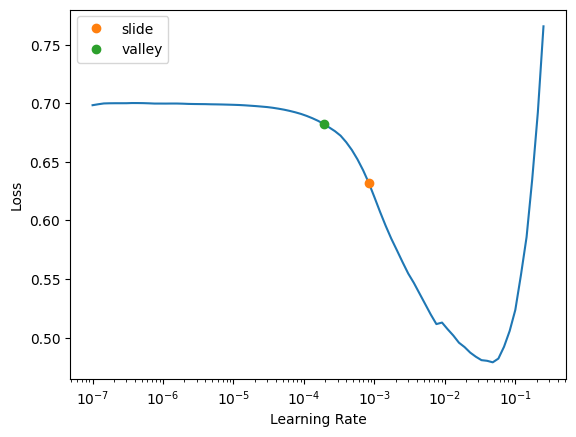

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2,5.75e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.188486,0.146533,0.937507,00:40
1,0.133983,0.128766,0.940379,00:39


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
learner.save("book-classifier-stage-0")

Path('models/book-classifier-stage-0.pth')

In [ ]:
learner.export("models/book-classifier-stage-0.pkl")

In [ ]:
learner.unfreeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.009120108559727669, valley=1.737800812406931e-05)

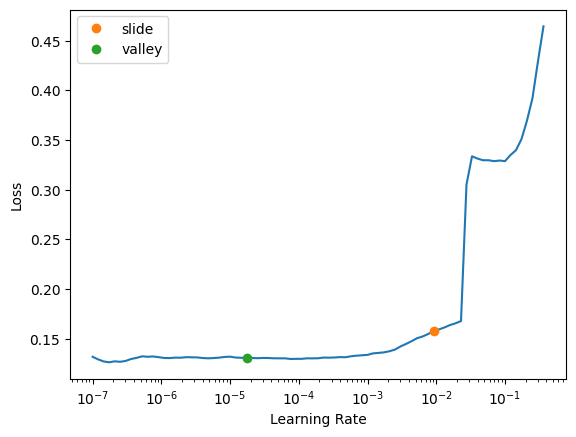

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3,slice(8.75e-3, 2.25e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.165977,0.158525,0.925950,00:49
1,0.137985,0.138797,0.933787,00:46
2,0.118561,0.131459,0.937368,00:46


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
learner.save("book-classifier-stage-1")

Path('models/book-classifier-stage-1.pth')

In [ ]:
learner.export("models/book-classifier-stage-1.pkl")